In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
'''
Controlador neuronal para una planta de segundo orden
Planta: mass-spring-damper system
m (d/dt)^2 x+ b (d/dt) x + kx=u
'''

#initial conditions
e = 0
e1 = 0
y = 0
u = 0
s1 = 0
s2 = 0


#Inicialización aleatoria de los pesos de la capa de entrada
w11 = np.random.random()
w12 = np.random.random()
w21 = np.random.random()
w22 = np.random.random()


#Inicialización aleatoria de los pesos de la capa oculta
v1 = np.random.random()
v2 = np.random.random()


#Términos para el factor de aprendizaje
eta = 0.2
it = 0
lim = 1e5
T=0.1
#Set-Point
sp = 1
signD = 1
x2=0
T,k,b,m=0.1,0.5,0.3,1
#Vectores auxiliares para graficar
tk = []
yk = []
spk = []
uk = []

while it < lim:
    #Cálculo de las sumatorias en las neuronas de entrada:
    s1=e*w11+e1*w21
    s2=e*w12+e1*w22

    #Cálculo de las salidas de las neuronas de entrada:
    h1=1/(1+np.exp(-s1))
    h2=1/(1+np.exp(-s2))

    #Cálculo de la sumatoria en la neurona de salida:
    r=h1*v1+h2*v2
    
    #Cálculo de la salida de la red
    u=1/(1+np.exp(-r))

    #Planta:
    y+=T*x2
    x2+=(T/m)*(-b*x2-k*y+u)

    #Cálculo del error del sistema
    e = sp - y
    
    delta1 = e*(u*(1-u))
    delta21=delta1*v1*(h1*(1-h1))
    delta22=delta1*v2*(h2*(1-h2))

    #Ecuaciones de optimización para los pesos:
    v1 = v1 + eta*delta1*signD*h1
    v2 = v2 + eta*delta1*signD*h2

    w11 = w11 + eta*delta21*signD*e
    w12 = w12 + eta*delta22*signD*e

    w21 = w21 + eta*delta21*signD*e1
    w22 = w22 + eta*delta22*signD*e1


    if it%10 == 0:
        tk.append(it)
        yk.append(y)
        spk.append(sp)
        uk.append(u)

    e1 = e

    it += 1

    if it%(lim/4) == 0:
        sp = np.random.random()

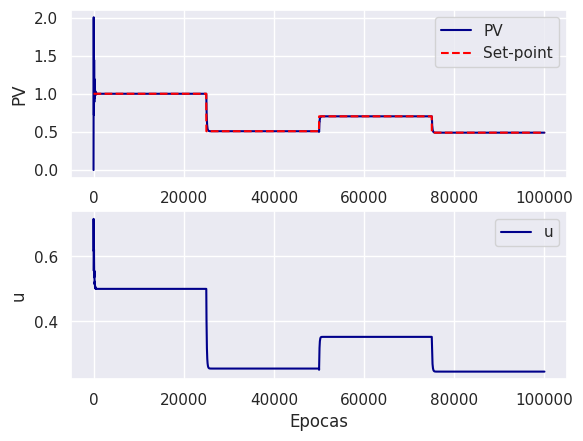

In [16]:
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2)

axs[0].plot(tk,yk, label = "PV", c = "darkblue")
axs[0].plot(tk,spk, label = "Set-point", linestyle = "--", c = "red")

axs[0].set(xlabel='Epocas', ylabel='PV')
axs[0].legend()

axs[1].plot(tk,uk, label = "u", c = "darkblue")
axs[1].set(xlabel='Epocas', ylabel='u')
axs[1].legend()